In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import random
from src.dataGenerator import DataGenerator

# Data Generation

1. [Parameters setup](#Parameters-Setup)
2. [Patient Data Setup](#Patient-Data-Setup)
3. Output

    a. [Case 1: Apparent Imbalance](#Case-1:-Apparent-Imbalance)

    b. [Case 2: Apparent Imbalance](#Case-2:-Apparent-Imbalance)
    
    c. [Case 3: Genuine Imbalance](#Case-3:-Genuine-Imbalance)
    
    d. [Preview](#Preview)

## Parameters Setup

In [2]:
config = {
    "Nold": 500, 
    "oldTreatRate": 0.1, 
    
    "Nyoung": 500,
    "youngTreatRate": 1-0.1, 
}
dataGenerator = DataGenerator(config)
Nold = config["Nold"]
oldTreatRate = config["oldTreatRate"]
Nyoung = config["Nyoung"]
youngTreatRate = config["youngTreatRate"]

In [3]:
# ========== local control ==========
doRandomCoefficient = False#True
# ========== local control ==========



if doRandomCoefficient:
    set1 = np.arange(1, 11) * (-1) ** np.random.randint(0, 2)
    set2 = np.arange(11, 21) * (-1) ** np.random.randint(0, 2)
    set3 = np.arange(41, 51) * (-1) ** np.random.randint(0, 2)
    set4 = np.arange(91, 101) * (-1) ** np.random.randint(0, 2)
    coefConfig = [set1, set2, set3, set4]
    random.shuffle(coefConfig)
    A = dataGenerator.getCoefficient(candidate = coefConfig[0])
    B = dataGenerator.getCoefficient(candidate = coefConfig[1])
    C = dataGenerator.getCoefficient(candidate = coefConfig[2])
    D = dataGenerator.getCoefficient(candidate = coefConfig[3])
else:
    A = 100
    B = 20
    C = 3
    D = 50

coefficients = {
    "A": A, 
    "B": B, 
    "C": C, 
    "D": D,
}

print(coefficients)

{'A': 100, 'B': 20, 'C': 3, 'D': 50}


## Patient Data Setup

In [4]:
# Age (binary, 0 is young and 1 is old)
youngAge = dataGenerator.getAge(ageType=-1)
oldAge = dataGenerator.getAge(ageType=1)

youngAgeTag = dataGenerator.getAgeTag(ageType=-1)
oldAgeTag = dataGenerator.getAgeTag(ageType=1)

# Sex (binary, 0 is female and 1 is male)
youngSex = dataGenerator.getSex(age=youngAge)
oldSex = dataGenerator.getSex(age=oldAge)

# Treatment
youngT = dataGenerator.getTreatment(sex=youngSex, ageType=-1)
oldT = dataGenerator.getTreatment(sex=oldSex, ageType=1)

In [5]:
oldData = np.vstack((oldT, oldAge, oldAgeTag, oldSex)).T
oldData = pd.DataFrame(oldData)
oldData = oldData.rename(columns={0:'T', 1:'Age', 2:'AgeTag', 3:'Sex'})
oldData = oldData.sample(frac=1)

youngData = np.vstack((youngT, youngAge, youngAgeTag, youngSex)).T
youngData = pd.DataFrame(youngData)
youngData = youngData.rename(columns={0:'T', 1:'Age', 2:'AgeTag', 3:'Sex'})
youngData = youngData.sample(frac=1)

In [6]:
print(oldData.describe())
print('-'*50)
print(youngData.describe())

                T         Age  AgeTag         Sex
count  500.000000  500.000000   500.0  500.000000
mean    -0.800000    0.760000     1.0    0.000000
std      0.600601    0.144366     0.0    1.001002
min     -1.000000    0.520000     1.0   -1.000000
25%     -1.000000    0.640000     1.0   -1.000000
50%     -1.000000    0.760000     1.0    0.000000
75%     -1.000000    0.880000     1.0    1.000000
max      1.000000    1.000000     1.0    1.000000
--------------------------------------------------
                T         Age  AgeTag         Sex
count  500.000000  500.000000   500.0  500.000000
mean     0.800000    0.260000    -1.0    0.000000
std      0.600601    0.144366     0.0    1.001002
min     -1.000000    0.020000    -1.0   -1.000000
25%      1.000000    0.140000    -1.0   -1.000000
50%      1.000000    0.260000    -1.0    0.000000
75%      1.000000    0.380000    -1.0    1.000000
max      1.000000    0.500000    -1.0    1.000000


In [7]:
noiseScale = 2

## Case 1: Apparent Imbalance
$$y = A\times Sex +$$
$$B\times T + $$
$$D\times Sex \times T$$

In [8]:
oldData['yo1'] = dataGenerator.getOutcome1(oldData, coefficients)
oldData['yo1CF'] = dataGenerator.getOutcome1(oldData, coefficients, CF=True)
oldData['y1'] = dataGenerator.addNoise(oldData['yo1'], scale=noiseScale)
oldData['y1CF'] = dataGenerator.addNoise(oldData['yo1CF'], scale=noiseScale)

youngData['yo1'] = dataGenerator.getOutcome1(youngData, coefficients)
youngData['y1'] = dataGenerator.addNoise(youngData['yo1'], scale=noiseScale)
youngData['yo1CF'] = dataGenerator.getOutcome1(youngData, coefficients, CF=True)
youngData['y1CF'] = dataGenerator.addNoise(youngData['yo1CF'], scale=noiseScale)

## Case 2: Apparent Imbalance
$$y = A\times Sex +$$
$$B\times T + $$
$$C\times Age + $$
$$D\times Age\times Sex$$

In [9]:
oldData['yo2'] = dataGenerator.getOutcome2(oldData, coefficients)
oldData['yo2CF'] = dataGenerator.getOutcome2(oldData, coefficients, CF=True)
oldData['y2'] = dataGenerator.addNoise(oldData['yo2'], scale=noiseScale)
oldData['y2CF'] = dataGenerator.addNoise(oldData['yo2CF'], scale=noiseScale)

youngData['yo2'] = dataGenerator.getOutcome2(youngData, coefficients)
youngData['y2'] = dataGenerator.addNoise(youngData['yo2'], scale=noiseScale)
youngData['yo2CF'] = dataGenerator.getOutcome2(youngData, coefficients, CF=True)
youngData['y2CF'] = dataGenerator.addNoise(youngData['yo2CF'], scale=noiseScale)

## Case 3: Genuine Imbalance
$$y = A\times Sex +$$
$$B\times T + $$
$$C\times Age + $$
$$D\times Age\times T$$

In [10]:
oldData['yo3'] = dataGenerator.getOutcome3(oldData, coefficients)
oldData['yo3CF'] = dataGenerator.getOutcome3(oldData, coefficients, CF=True)
oldData['y3'] = dataGenerator.addNoise(oldData['yo3'], scale=noiseScale)
oldData['y3CF'] = dataGenerator.addNoise(oldData['yo3CF'], scale=noiseScale)

youngData['yo3'] = dataGenerator.getOutcome3(youngData, coefficients)
youngData['y3'] = dataGenerator.addNoise(youngData['yo3'], scale=noiseScale)
youngData['yo3CF'] = dataGenerator.getOutcome3(youngData, coefficients, CF=True)
youngData['y3CF'] = dataGenerator.addNoise(youngData['yo3CF'], scale=noiseScale)

In [11]:
totalData = pd.concat([oldData, youngData], axis=0).sample(frac=1)
totalData

,T,Age,AgeTag,Sex,yo1,yo1CF,y1,y1CF,yo2,yo2CF,y2,y2CF,yo3,yo3CF,y3,y3CF
203,-1.0,0.88,1.0,1.0,30.0,170.0,27.517345,170.500141,126.64,166.64,124.110292,166.055047,38.64,166.64,39.314765,164.140881
490,-1.0,0.82,1.0,-1.0,-70.0,-130.0,-70.602479,-135.718477,-158.54,-118.54,-158.120955,-116.899710,-158.54,-36.54,-158.610023,-34.879935
66,1.0,0.38,-1.0,1.0,170.0,30.0,171.062813,30.095927,140.14,100.14,136.685559,103.525223,140.14,62.14,137.187119,59.333987
40,-1.0,0.70,1.0,1.0,30.0,170.0,27.307242,166.537467,117.10,157.10,117.330569,156.388051,47.10,157.10,48.231077,156.391780
249,1.0,0.66,1.0,-1.0,-130.0,-70.0,-131.322072,-69.147782,-111.02,-151.02,-111.918354,-154.681770,-45.02,-151.02,-47.156174,-148.057093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,1.0,0.04,-1.0,1.0,170.0,30.0,170.556695,30.242133,122.12,82.12,120.305645,84.582359,122.12,78.12,122.910634,82.032997
381,-1.0,0.98,1.0,-1.0,-70.0,-130.0,-70.788468,-133.872483,-166.06,-126.06,-163.550310,-125.758602,-166.06,-28.06,-166.688622,-28.169355
479,-1.0,0.70,1.0,-1.0,-70.0,-130.0,-69.976796,-131.767957,-152.90,-112.90,-151.740655,-110.734556,-152.90,-42.90,-151.416569,-41.264839
2,1.0,0.94,1.0,1.0,170.0,30.0,170.713875,32.491828,169.82,129.82,165.720083,129.512804,169.82,35.82,169.901245,30.831237


## Preview

In [12]:
# ========== local control ==========
doDraw = True
doSaveCSV = False
txtSubname = "contiPositiveAgeA{}B{}C{}Int{}R{}_posTE".format(A, B, C, D, noiseScale)#"contiPositiveAgeInt25"
print(txtSubname)
# ========== local control ==========
def countNumber(data, x, y):
    uniqueX, uniqueY = np.unique(data[x]), np.unique(data[y])
    countGrid = np.zeros((len(uniqueX), len(uniqueY)))
    for i in range(countGrid.shape[0]): # x length
        for j in range(countGrid.shape[1]): # y length
            countGrid[i, j] = np.sum(np.logical_and(data[x] == uniqueX[i], data[y] == uniqueY[j]))
    return countGrid

def drawGrid(data, x, y, title=None, figsize=(5, 5)):
    countGrid = countNumber(data, x, y)
    fig, axs = plt.subplots(1, 1, figsize=figsize)
    plt.pcolormesh(countGrid.T, cmap="autumn", edgecolors='black')
    for i in range(countGrid.shape[0]):
        for j in range(countGrid.shape[1]):
            plt.text(i+0.5, j+0.5, int(countGrid[i, j]), va="center", ha="center", size=20)
    plt.xlabel(x, fontsize=15)
    plt.ylabel(y, fontsize=15)
    if len(np.unique(data[x])) == 2:
        plt.xticks([0.5, 1.5], [str(int(x)) for x in np.unique(data[x])], fontsize=15)
        plt.yticks([0.5, 1.5], [str(int(x)) for x in np.unique(data[y])], fontsize=15)
    if title:
        plt.title(title, fontsize=15)
    plt.show()

contiPositiveAgeA100B20C3Int50R2_posTE


In [13]:
if doSaveCSV:
    oldData.to_csv("data/oldData{}.csv".format(txtSubname))
    youngData.to_csv("data/youngData{}.csv".format(txtSubname))
    totalData.to_csv("data/totalData{}.csv".format(txtSubname))
    np.savetxt('data/coef{}.txt'.format(txtSubname), np.array([A, B, C, D]))
    print("Data saved")

Data saved


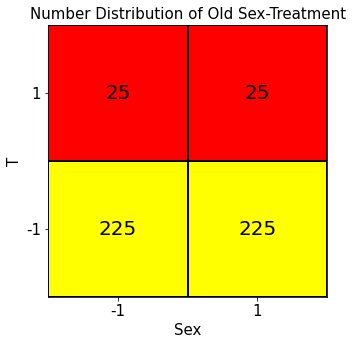

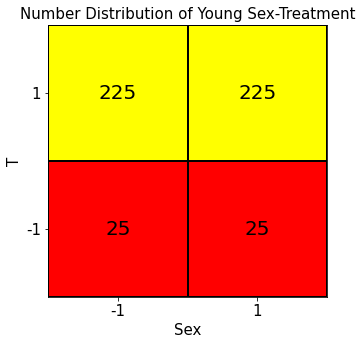

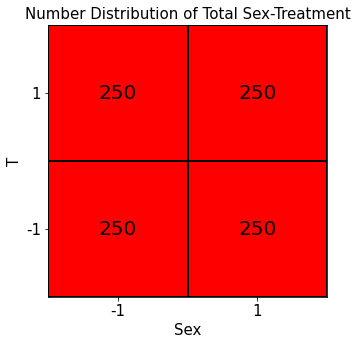

In [14]:
# ========== draw Old/Young/Overall Sex - Treatment ==========
if doDraw: 
    drawGrid(oldData, 'Sex', 'T', title="Number Distribution of Old Sex-Treatment")
    drawGrid(youngData, 'Sex', 'T', title="Number Distribution of Young Sex-Treatment")
    drawGrid(totalData, 'Sex', 'T', title="Number Distribution of Total Sex-Treatment")

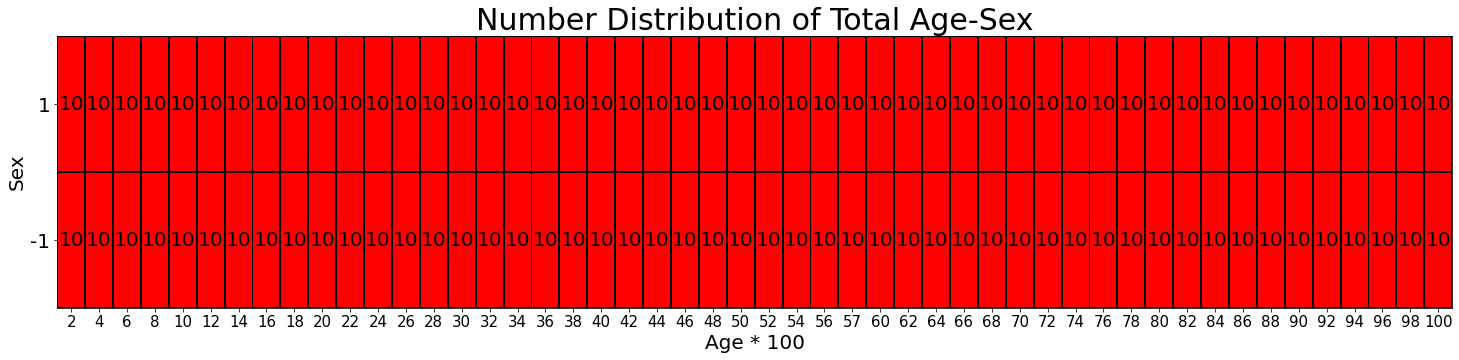

In [15]:
countGrid = countNumber(totalData, 'Age', 'Sex')
fig, axs = plt.subplots(1, 1, figsize=(25, 5))
plt.pcolormesh(countGrid.T, cmap="autumn", edgecolors='black')
for i in range(countGrid.shape[0]):
    for j in range(countGrid.shape[1]):
        plt.text(i+0.5, j+0.5, int(countGrid[i, j]), va="center", ha="center", size=20)
plt.xlabel('Age * 100', fontsize=20)
plt.ylabel('Sex', fontsize=20)
plt.xticks([x+0.5 for x in range(len(np.unique(totalData['Age'])))], [str(int(x*100)) for x in np.unique(totalData['Age'])], fontsize=15)
plt.yticks([0.5, 1.5], [str(int(x)) for x in np.unique(totalData['Sex'])], fontsize=20)
if True:
    plt.title("Number Distribution of Total Age-Sex", fontsize=30)
plt.show()

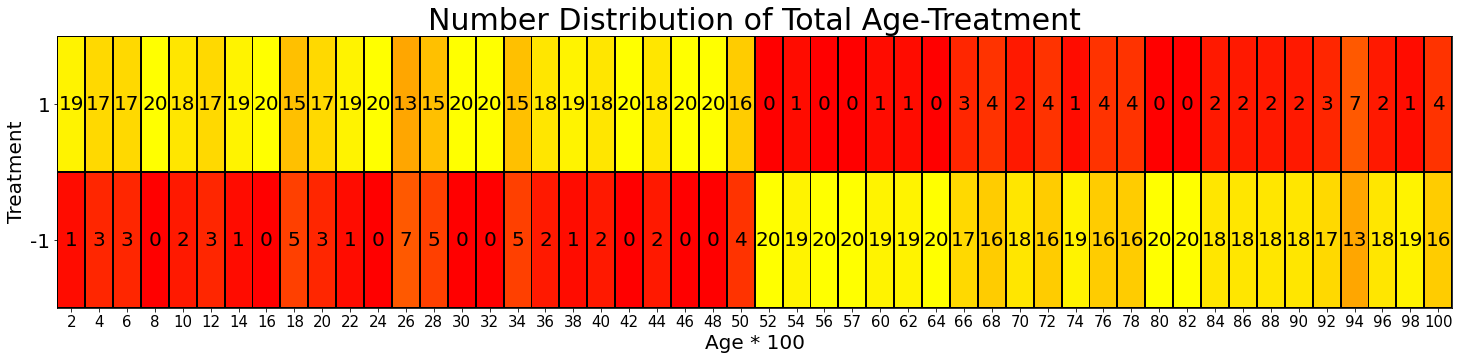

In [16]:
countGrid = countNumber(totalData, 'Age', 'T')
fig, axs = plt.subplots(1, 1, figsize=(25, 5))
plt.pcolormesh(countGrid.T, cmap="autumn", edgecolors='black')
for i in range(countGrid.shape[0]):
    for j in range(countGrid.shape[1]):
        plt.text(i+0.5, j+0.5, int(countGrid[i, j]), va="center", ha="center", size=20)
plt.xlabel('Age * 100', fontsize=20)
plt.ylabel('Treatment', fontsize=20)
plt.xticks([x+0.5 for x in range(len(np.unique(totalData['Age'])))], [str(int(x*100)) for x in np.unique(totalData['Age'])], fontsize=15)
plt.yticks([0.5, 1.5], [str(int(x)) for x in np.unique(totalData['Sex'])], fontsize=20)
if True:
    plt.title("Number Distribution of Total Age-Treatment", fontsize=30)
plt.show()

In [17]:
def drawOutcomesVersusRandom(data, yType, title):
    uniqueOutcome, countUnique = np.unique(data['yo'+yType], return_counts=True)

    fig, axs = plt.subplots(1, 1, figsize=(10, 10))
    for i in range(len(uniqueOutcome)):
        if np.sum([(data['T'] == np.max(data['T'])) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == np.max(data['Age']))]):
            VP = plt.violinplot(np.array(data['y'+yType][(data['T'] == np.max(data['T'])) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == np.max(data['Age']))]), \
                          positions=[uniqueOutcome[i]], widths=10)
            for pc in VP['bodies']:
                pc.set_facecolor('green')
                pc.set_edgecolor('green')
            for partname in ('cbars','cmins','cmaxes'):
                vp = VP[partname]
                vp.set_edgecolor('green')
                vp.set_facecolor('green')
                vp.set_linewidth(1)
            plt.text(x=uniqueOutcome[i], y=uniqueOutcome[i] + 1.1 * (np.max(data['y'+yType][data['yo'+yType] == uniqueOutcome[i]])-uniqueOutcome[i]), 
                     s=np.array(countUnique, dtype=str)[i], color='green', fontsize=15, ha='center')
        
        elif np.sum([(data['T'] == np.max(data['T'])) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == np.min(data['Age']))]):
            VP = plt.violinplot(np.array(data['y'+yType][(data['T'] == np.max(data['T'])) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == np.min(data['Age']))]), \
                          positions=[uniqueOutcome[i]], widths=10)
            for pc in VP['bodies']:
                pc.set_facecolor('green')
                pc.set_edgecolor('green')
            for partname in ('cbars','cmins','cmaxes'):
                vp = VP[partname]
                vp.set_edgecolor('green')
                vp.set_facecolor('green')
                vp.set_linewidth(1)
            plt.text(x=uniqueOutcome[i], y=uniqueOutcome[i] + 1.1 * (np.max(data['y'+yType][data['yo'+yType] == uniqueOutcome[i]])-uniqueOutcome[i]), 
                     s=np.array(countUnique, dtype=str)[i], color='green', fontsize=15, ha='center')
            
        elif np.sum([(data['T'] == np.min(data['T'])) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == 1)]):
            VP = plt.violinplot(np.array(data['y'+yType][(data['T'] == np.min(data['T'])) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == np.max(data['Age']))]), \
                          positions=[uniqueOutcome[i]], widths=10)
            for pc in VP['bodies']:
                pc.set_facecolor('red')
                pc.set_edgecolor('red')
            for partname in ('cbars','cmins','cmaxes'):
                vp = VP[partname]
                vp.set_edgecolor('red')
                vp.set_facecolor('red')
                vp.set_linewidth(1)
            plt.text(x=uniqueOutcome[i], y=uniqueOutcome[i] + 1.1 * (np.max(data['y'+yType][data['yo'+yType] == uniqueOutcome[i]])-uniqueOutcome[i]), 
                     s=np.array(countUnique, dtype=str)[i], color='red', fontsize=15, ha='center')
        
        elif np.sum([(data['T'] == np.min(data['T'])) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == np.min(data['Age']))]):
            VP = plt.violinplot(np.array(data['y'+yType][(data['T'] == np.min(data['T'])) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == np.min(data['Age']))]), \
                          positions=[uniqueOutcome[i]], widths=10)
            for pc in VP['bodies']:
                pc.set_facecolor('red')
                pc.set_edgecolor('red')
            for partname in ('cbars','cmins','cmaxes'):
                vp = VP[partname]
                vp.set_edgecolor('red')
                vp.set_facecolor('red')
                vp.set_linewidth(1)
            plt.text(x=uniqueOutcome[i], y=uniqueOutcome[i] + 1.1 * (np.max(data['y'+yType][data['yo'+yType] == uniqueOutcome[i]])-uniqueOutcome[i]), 
                     s=np.array(countUnique, dtype=str)[i], color='red', fontsize=15, ha='center')

    plt.scatter(data['yo'+yType], data['yo'+yType], color='black', zorder=3)
    plt.scatter(data['yo'+yType], data['yo'+yType+'CF'], color='black', zorder=3, marker='x')
    plt.xlabel('Without Noise', fontsize=15)
    plt.xticks(fontsize=15)
    plt.ylabel('With Noise', fontsize=15)
    plt.yticks(fontsize=15)
    #plt.ylim(np.min(uniqueOutcome)-(np.max(uniqueOutcome)-np.min(uniqueOutcome))*0.2, np.max(uniqueOutcome)+(np.max(uniqueOutcome)-np.min(uniqueOutcome))*0.2)
    #plt.xlim(np.min(uniqueOutcome)-(np.max(uniqueOutcome)-np.min(uniqueOutcome))*0.2, np.max(uniqueOutcome)+(np.max(uniqueOutcome)-np.min(uniqueOutcome))*0.2)
    if title:
        plt.title("Noise Effect | Case {} | {}".format(yType, title), fontsize=20)
    plt.show()

In [18]:
def drawOutcomes(data, yType):
    yClass = 'y{}'.format(yType)
    yClassCF = 'y{}CF'.format(yType)
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    # treat & male
    condition = np.logical_and(data['T']==np.max(data['T']), data['Sex']==np.max(data['Sex']))
    axs[0].scatter(data['Age'][condition], data[yClass][condition], color='blue')
    axs[1].scatter(data['Age'][condition], data[yClassCF][condition], color='blue', marker='x')
    # treat & female
    condition = np.logical_and(data['T']==np.max(data['T']), data['Sex']==np.min(data['Sex']))
    axs[0].scatter(data['Age'][condition], data[yClass][condition], color='red')
    axs[1].scatter(data['Age'][condition], data[yClassCF][condition], color='red', marker='x')
    # untreat & male
    condition = np.logical_and(data['T']==np.min(data['T']), data['Sex']==np.max(data['Sex']))
    axs[0].scatter(data['Age'][condition], data[yClass][condition], color='blue', marker='x')
    axs[1].scatter(data['Age'][condition], data[yClassCF][condition], color='blue')
    # untreat & female
    condition = np.logical_and(data['T']==np.min(data['T']), data['Sex']==np.min(data['Sex']))
    axs[0].scatter(data['Age'][condition], data[yClass][condition], color='red', marker='x')
    axs[1].scatter(data['Age'][condition], data[yClassCF][condition], color='red')
    
    xAmplitude = (np.max(data['Age']) - np.min(data['Age']))/2
    axs[0].set_xlim(np.min(data['Age'])-(xAmplitude)*0.1, np.max(data['Age'])+(xAmplitude)*0.1)
    axs[1].set_xlim(np.min(data['Age'])-(xAmplitude)*0.1, np.max(data['Age'])+(xAmplitude)*0.1)
    
    yAmplitude = (np.max(data[yClass]) - np.min(data[yClass]))/2
    axs[0].set_ylim(np.min(data[yClass])-(yAmplitude)*0.1, np.max(data[yClass])+(yAmplitude)*0.1)
    axs[1].set_ylim(np.min(data[yClass])-(yAmplitude)*0.1, np.max(data[yClass])+(yAmplitude)*0.1)
    
    axs[0].set_xlabel('Age', fontsize=20)
    axs[0].tick_params(axis='both', labelsize=20)
    axs[0].set_ylabel('Outcome', fontsize=20)
    axs[1].set_xlabel('Age', fontsize=20)
    axs[1].tick_params(axis='both', labelsize=20)
    axs[1].set_ylabel('Counterfactual Outcome', fontsize=20)
    fig.suptitle('Case {}'.format(yType), fontsize=40)
    plt.show()

In [19]:
def drawOutcomes2(data, yType):
    yClass = 'y{}'.format(yType)
    yClassCF = 'y{}CF'.format(yType)
    fig, axs = plt.subplots(1, 1, figsize=(15, 10))
    
    markerSize = 75
    #cmap = "rainbow"
    interval = np.hstack([0, 0.1, 0.2, 0.8, 0.9, 1.0])
    colors = plt.cm.rainbow(interval)
    cmap = LinearSegmentedColormap.from_list('name', colors)
    gap = (np.max(data[yClass]) - np.min(data[yClass])) / 2
    # treat & male
    condition = np.logical_and(data['T']==np.max(data['T']), data['Sex']==np.max(data['Sex']))
    BLUE=axs.scatter(data['Age'][condition], data[yClass][condition], s=markerSize, \
                cmap=cmap, c=data[yClassCF][condition]-data[yClass][condition], vmin=-gap, vmax=gap)
    cbar = plt.colorbar(BLUE, extend='both')
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.tick_params(labelsize=20)
    cbar.ax.set_ylabel('Counterfactual - Factual', rotation=270, fontsize=20)
    #axs.scatter(data['Age'][condition], data[yClassCF][condition], color='blue', marker='x')
    
    # treat & female
    condition = np.logical_and(data['T']==np.max(data['T']), data['Sex']==np.min(data['Sex']))
    RED=axs.scatter(data['Age'][condition], data[yClass][condition], s=markerSize, \
                cmap=cmap, c=data[yClassCF][condition]-data[yClass][condition], vmin=-gap, vmax=gap, \
                edgecolor='black')
    #axs.scatter(data['Age'][condition], data[yClassCF][condition], color='red', marker='x')
    
    # untreat & male
    condition = np.logical_and(data['T']==np.min(data['T']), data['Sex']==np.max(data['Sex']))
    BLUE=axs.scatter(data['Age'][condition], data[yClass][condition], s=markerSize, \
                cmap=cmap, c=data[yClassCF][condition]-data[yClass][condition], vmin=-gap, vmax=gap, \
                marker='X')
    #axs.scatter(data['Age'][condition], data[yClassCF][condition], color='blue')
    
    # untreat & female
    condition = np.logical_and(data['T']==np.min(data['T']), data['Sex']==np.min(data['Sex']))
    RED=axs.scatter(data['Age'][condition], data[yClass][condition], s=markerSize, \
                cmap=cmap, c=data[yClassCF][condition]-data[yClass][condition], vmin=-gap, vmax=gap, \
                edgecolor='black', marker='X')
    #axs.scatter(data['Age'][condition], data[yClassCF][condition], color='red')
    
    xAmplitude = (np.max(data['Age']) - np.min(data['Age']))/2
    axs.set_xlim(np.min(data['Age'])-(xAmplitude)*0.1, np.max(data['Age'])+(xAmplitude)*0.1)
    axs.set_xlim(np.min(data['Age'])-(xAmplitude)*0.1, np.max(data['Age'])+(xAmplitude)*0.1)
    
    yAmplitude = (np.max(data[yClass]) - np.min(data[yClass]))/2
    axs.set_ylim(np.min(data[yClass])-(yAmplitude)*0.1, np.max(data[yClass])+(yAmplitude)*0.1)
    axs.set_ylim(np.min(data[yClass])-(yAmplitude)*0.1, np.max(data[yClass])+(yAmplitude)*0.1)
    
    axs.set_xlabel('Age', fontsize=20)
    axs.tick_params(axis='both', labelsize=20)
    axs.set_ylabel('Outcome', fontsize=20)
    #axs[1].set_xlabel('Age', fontsize=20)
    #axs[1].tick_params(axis='both', labelsize=20)
    #axs[1].set_ylabel('Counterfactual Outcome', fontsize=20)
    fig.suptitle('Case {}'.format(yType), fontsize=40)
    plt.show()

In [20]:
def drawOutcomes3(data, yType):
    yClass = 'y{}'.format(yType)
    yClassCF = 'y{}CF'.format(yType)
    fig, axs = plt.subplots(1, 1, figsize=(13, 10))
    
    markerSize = 75
    alpha=1
    #cmap = "rainbow"
    interval = np.hstack([np.linspace(0, 0.3, 100), np.linspace(0.7, 1.0, 100)])
    colors = plt.cm.coolwarm(interval)
    ageCmap = LinearSegmentedColormap.from_list('name', colors)
    gap = (np.max(data[yClass]) - np.min(data[yClass])) / 2
    axs.plot([np.min(data[yClass]), np.max(data[yClass])], [np.min(data[yClass]), np.max(data[yClass])], \
             color='grey', zorder=0)
    # treat & male
    condition = np.logical_and(data['T']==np.max(data['T']), data['Sex']==np.max(data['Sex']))
    SCT=axs.scatter(data[yClass][condition], data[yClass][condition], s=markerSize, cmap=ageCmap, alpha=alpha, c=data['Age'][condition], vmin=np.min(data['Age']), vmax=np.max(data['Age']))
    axs.scatter(data[yClass][condition], data[yClassCF][condition], cmap=ageCmap, marker='x', alpha=alpha, c=data['Age'][condition], vmin=np.min(data['Age']), vmax=np.max(data['Age']))
    cbar=plt.colorbar(SCT)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.tick_params(labelsize=20)
    cbar.ax.set_ylabel('Age', rotation=270, fontsize=20)
    # treat & female
    condition = np.logical_and(data['T']==np.max(data['T']), data['Sex']==np.min(data['Sex']))
    axs.scatter(data[yClass][condition], data[yClass][condition], s=markerSize, cmap=ageCmap, alpha=alpha, c=data['Age'][condition], vmin=np.min(data['Age']), vmax=np.max(data['Age']))
    axs.scatter(data[yClass][condition], data[yClassCF][condition], cmap=ageCmap, marker='x', alpha=alpha, c=data['Age'][condition], vmin=np.min(data['Age']), vmax=np.max(data['Age']))
    
    # untreat & male
    condition = np.logical_and(data['T']==np.min(data['T']), data['Sex']==np.max(data['Sex']))
    axs.scatter(data[yClass][condition], data[yClass][condition], s=markerSize, marker='x', cmap=ageCmap, alpha=alpha, c=data['Age'][condition], vmin=np.min(data['Age']), vmax=np.max(data['Age']))
    axs.scatter(data[yClass][condition], data[yClassCF][condition], cmap=ageCmap, alpha=alpha, c=data['Age'][condition], vmin=np.min(data['Age']), vmax=np.max(data['Age']))
    
    # untreat & female
    condition = np.logical_and(data['T']==np.min(data['T']), data['Sex']==np.min(data['Sex']))
    axs.scatter(data[yClass][condition], data[yClass][condition], s=markerSize, marker='x', cmap=ageCmap, alpha=alpha, c=data['Age'][condition], vmin=np.min(data['Age']), vmax=np.max(data['Age']))
    axs.scatter(data[yClass][condition], data[yClassCF][condition], cmap=ageCmap, alpha=alpha, c=data['Age'][condition], vmin=np.min(data['Age']), vmax=np.max(data['Age']))
    
    xAmplitude = (np.max(data[yClass]) - np.min(data[yClass]))/2
    scale = 0.4
    axs.set_xlim(np.min(data[yClass])-(xAmplitude)*scale, np.max(data[yClass])+(xAmplitude)*scale)
    axs.set_xlim(np.min(data[yClass])-(xAmplitude)*scale, np.max(data[yClass])+(xAmplitude)*scale)
    
    yAmplitude = (np.max(data[yClass]) - np.min(data[yClass]))/2
    axs.set_ylim(np.min(data[yClass])-(yAmplitude)*scale, np.max(data[yClass])+(yAmplitude)*scale)
    axs.set_ylim(np.min(data[yClass])-(yAmplitude)*scale, np.max(data[yClass])+(yAmplitude)*scale)
    
    axs.set_xlabel('Factual', fontsize=20)
    axs.tick_params(axis='both', labelsize=20)
    axs.set_ylabel('Outcomes', fontsize=20)
    fig.suptitle('Case {}'.format(yType), fontsize=40)
    #plt.gca().set_aspect('equal')
    plt.show()

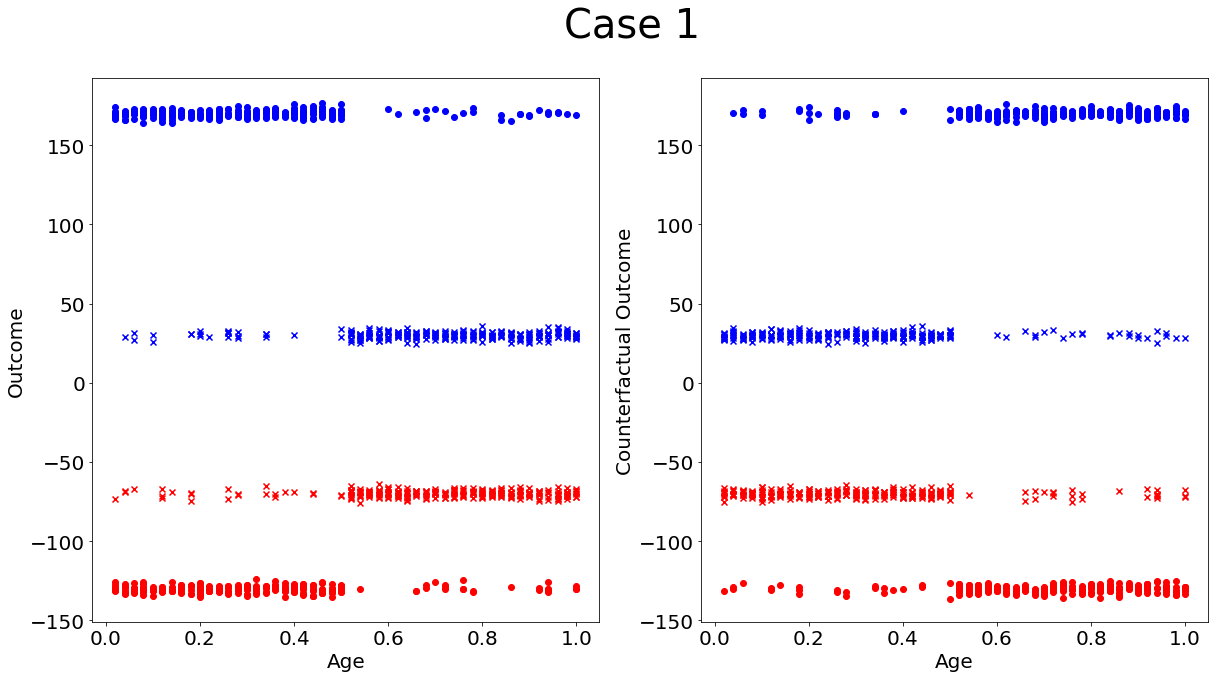

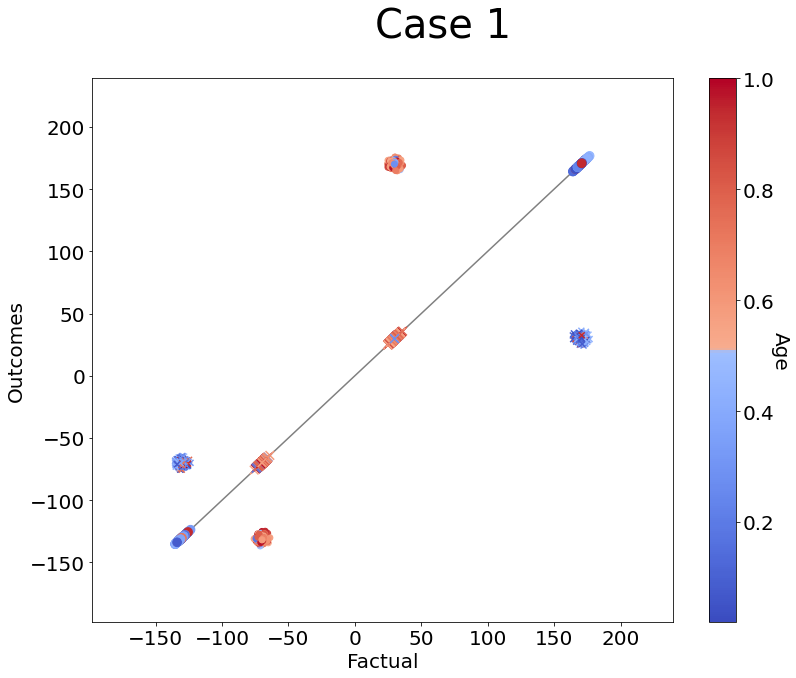

In [21]:
# ========== draw noise effect on origin  y==========
if doDraw:
    yType = '1'
    #drawOutcomesVersusRandom(oldData, yType=yType, title='Old')
    #drawOutcomesVersusRandom(youngData, yType=yType, title='Young')
    #drawOutcomesVersusRandom(totalData, yType=yType, title='Total')
    drawOutcomes(totalData, yType=yType)
    #drawOutcomes2(totalData, yType=yType)
    drawOutcomes3(totalData, yType=yType)
    

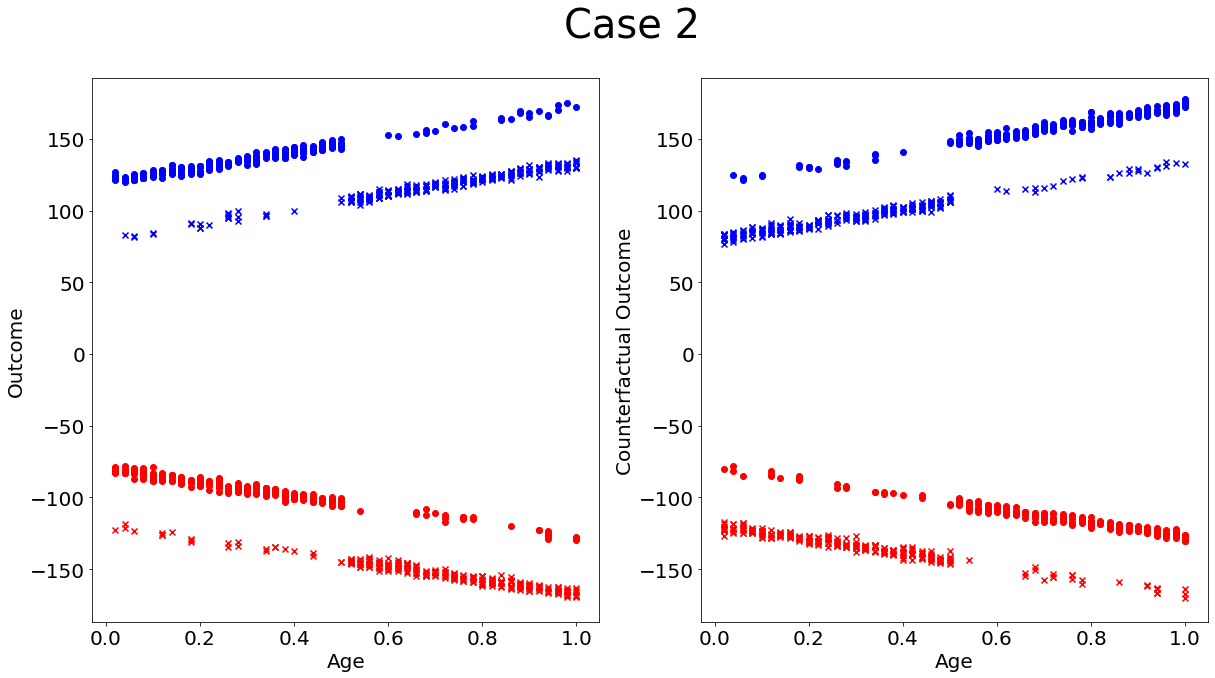

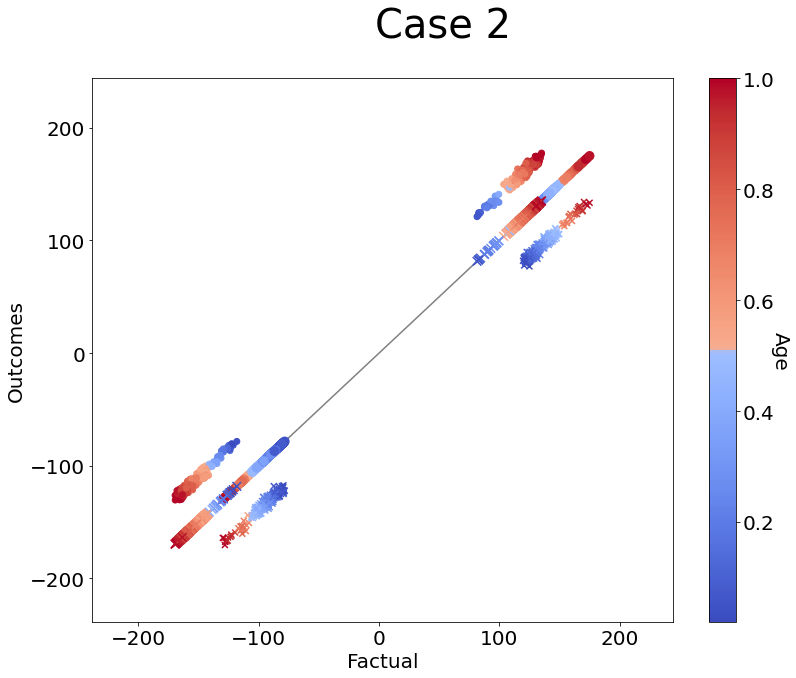

In [22]:
# ========== draw noise effect on origin  y==========
if doDraw:
    yType = '2'
    #drawOutcomesVersusRandom(oldData, yType=yType, title='Old')
    #drawOutcomesVersusRandom(youngData, yType=yType, title='Young')
    #drawOutcomesVersusRandom(totalData, yType=yType, title='Total')
    drawOutcomes(totalData, yType=yType)
    #drawOutcomes2(totalData, yType=yType)
    drawOutcomes3(totalData, yType=yType)

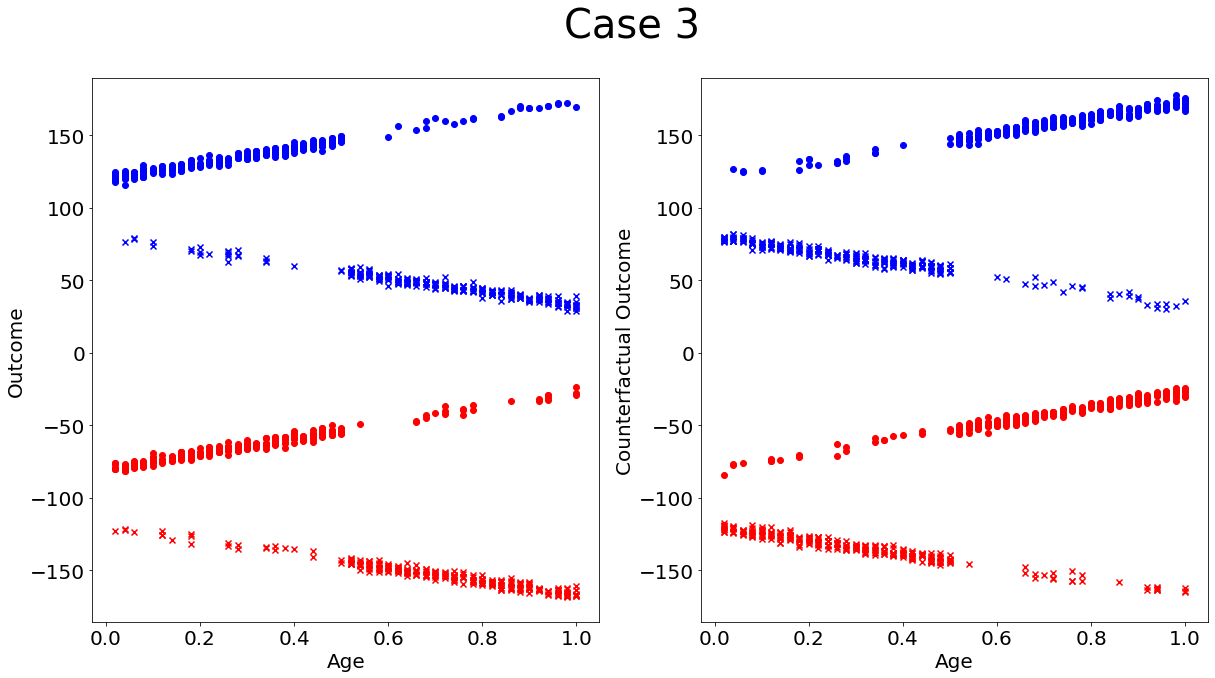

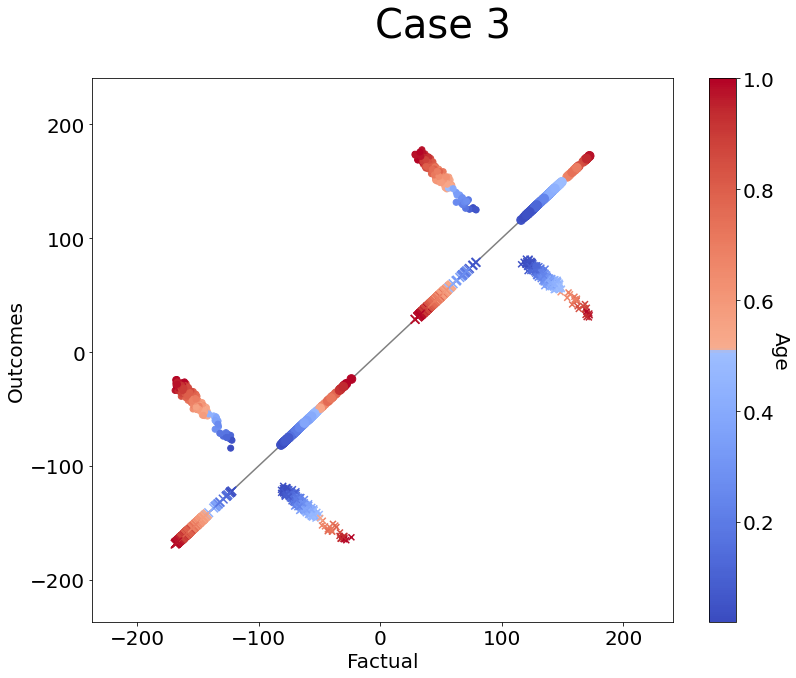

In [23]:
# ========== draw noise effect on origin  y==========
if doDraw:
    yType = '3'
    #drawOutcomesVersusRandom(oldData, yType=yType, title='Old')
    #drawOutcomesVersusRandom(youngData, yType=yType, title='Young')
    #drawOutcomesVersusRandom(totalData, yType=yType, title='Total')
    drawOutcomes(totalData, yType=yType)
    #drawOutcomes2(totalData, yType=yType)
    drawOutcomes3(totalData, yType=yType)
    